https://www.totango.com/customer-churn


https://towardsdatascience.com/end-to-end-machine-learning-project-telco-customer-churn-90744a8df97d

https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

Nesse projeto será realizado uma análise sobre o indice de churn da empresa

### Importação das bibliotecas

In [39]:

# Manipulação dos dados
import pandas as pd


# Para uso das matrizes e arrays
import numpy as np

# Para visualizção
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
dados = 'Telco-Customer-Churn.csv'
df = pd.read_csv(dados, sep = ',')

# Dimensões do dataset
print(f'Linhas: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')

# Verificando as primeira linhas do dataset
df.head(10)

Linhas: 7043
Colunas: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [13]:
print('Informações da base:')
print('*'*50)
df.info()

print(' '*50)

print('Verificando valores nulos:')
print('*'*50)
df.isnull().sum()

Informações da base:
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract         

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Informações sobre os atributos

<strong>customerID</strong>         -  Código identificador do Usuário <br>
<strong>gender</strong>              - Sexo do Usuário: Masculino / Feminino <br>
<strong>SeniorCitizen</strong>       - Indica se o cliente é idoso ou não <br>
<strong>Partner</strong>             - Se o cliente tem companheiro(a) <br>
<strong>Dependents</strong>          - Se o cliente possui dependentes <br>
<strong>tenure</strong>              - Tempo que o cliente esta com a empresa em meses <br>
<strong>PhoneService</strong>        - Se o cliente tem servico de telefone ou não <br>
<strong>MultipleLines</strong>       - Se o cliente tem mais de uma linha ou não <br>
<strong>InternetService</strong>     - Qual tipo provedor de internet do cliente <br>
<strong>OnlineSecurity</strong>      - Se o cliente possui servico de seguranca online <br>
<strong>OnlineBackup</strong>        - Se o cliente possui servico de backup online ou não <br>
<strong>DeviceProtection</strong>    - Se o cliente possui aparelho de protecao <br>
<strong>TechSupport</strong>           - Se o cliente tem suporte de TI ou não <br>
<strong>StreamingTV</strong>           - Se o cliente possui servico de Streaming de TV ou não <br>
<strong>StreamingMovies</strong>       - Se o cliente possui servico de Streaming de filmes ou não <br>
<strong>Contract</strong>              - O tipo de assinatura <br>
<strong>PaperlessBilling</strong>      - Se o cliente recebe a fatura sem papel ou não <br>
<strong>PaymentMethod</strong>         - Forma de pagamento <br>
<strong>MonthlyCharges</strong>        - Cobranca por mes <br>
<strong>TotalCharges</strong>          - Cobranca Total <br>
<strong>Churn </strong>                - se houve churn ou não <br>

### Conclusão:

* A principio o dataset não possui valores nulos <br><br>

* O dataset possui 7043 linhas e 21 colunas <br><br>

* A coluna  <strong>'SeniorCitizen'</strong> esta com dado do tipo inteiro, porém podemos verificar que se trata de uma coluna categórica que indica se o cliente possui mais de 65 anos ou não. <br><br>

* A coluna <strong>'TotalCharges'</strong> não está identificada como númerica 

## Limpeza e Transformação dos dados

In [17]:
# Ajustando o tipo de dado da coluna 'SeniorCitizen'
df['SeniorCitizen'] = df.SeniorCitizen.astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

print('Resumo estatístico da coluna:')
df.TotalCharges.describe()

Resumo estatístico da coluna:


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

### Observação:

* O parametro 'coerce', foi utilizado para os casos onde não fosse possível converter em numérico, transformaria o valor para o tipo NaN.

* Podemos observar agora que a coluna 'TotalCharges' possui 11 valores nulos, ou seja, que não foi possível realizar a conversão

In [30]:
nulos = df.TotalCharges.isnull().sum()
print('='*60)
print('Identificados {} valores nulos para a coluna TotalCharges'.format(nulos))
print('='*60)

df.info()

Identificados 11 valores nulos para a coluna TotalCharges
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null

Para esses valores nulos temos 2 opções:

* Excluir da base pois são poucos casos em comparação a total de registros da base
* Calcular esses valores considerando as colunas 'TotalCharges' e 'tenure', ou seja, a coluna de valor de cobranca mensal, multiplicada pela coluna que indica o tempo que o cliente esta com a empresa

Irei optar pela segunda opção

In [34]:
df.TotalCharges.fillna(value = df.tenure * df.MonthlyCharges, inplace = True)

nulos_ajustado = df.TotalCharges.isnull().sum()
print(f'Identificados {nulos_ajustado} valores nulos para a coluna TotalCharges')

Identificados 0 valores nulos para a coluna TotalCharges


## Análise Exploratória

### Variaveis numéricas

Iremos comcecar verificando um resumo estatístico das variáveis numéricas da base

In [38]:
df.describe().round()

,tenure,MonthlyCharges,TotalCharges
count,7043.0,7043.0,7043.0
mean,32.0,65.0,2280.0
std,25.0,30.0,2267.0
min,0.0,18.0,0.0
25%,9.0,36.0,399.0
50%,29.0,70.0,1395.0
75%,55.0,90.0,3787.0
max,72.0,119.0,8685.0


### Conclusão:

* Metade dos clientes permancem com a empresa, por mais de 29 meses ( 2 anos e 5 meses);
* O valor médio cobrado por mês é de 30.0
* O valor médio de receita por cliente é de 2280.0

Iremos agora verificar como essas variáveis numericas se relacionam

<Figure size 1080x720 with 0 Axes>

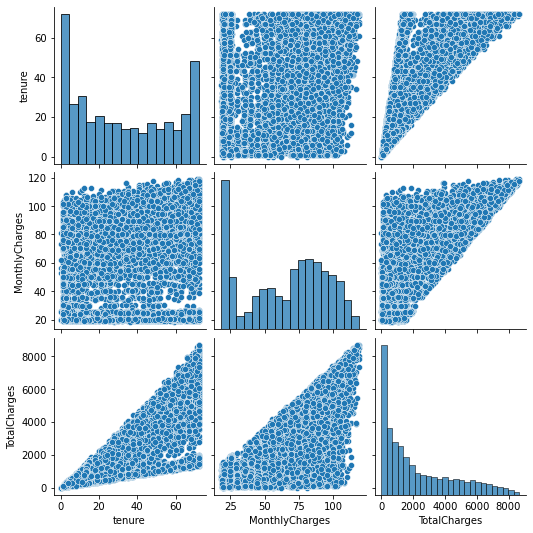

In [42]:
numerics = df[['tenure','MonthlyCharges', 'TotalCharges']]

plt.figure(figsize = (15,10))
sns.pairplot(numerics)

### Conclusão:

* Com a análise gráfica é possível verificar a relação entre o valor total de de gastos dos clientes pelo tempo de inscrição, o que faz total sentido, visto que quanto mais tempo de assinatura mais pagamentos ocorreram
<br><br>
* Não relação entre os valores mensais e o tempo de contrato, o que também faz sentido, pois o pagamento mensal dependerá do tipo de contrato e não do tempo que o cliente esta com a empresa
<br><br>
* A relação entre os valores mensais e o valor total, visto que quanto maior os valores mensais, maior o valor final total

### Variaveis Categóricas

Vamos comecar um análise sobre os dados demográficos:
 * Gender
 * SeniorCitizen
 * Partner   
 * Dependents

Para análise das variáveis categóricas vamos sempre levar em consideração a variavel 'Churn', algumas questões que iremos verificar:
<br>
   * O a variável sexo, influencia no churn da empresa?
   * As pessoas do grupo 'SeniorCitizen', possuem maior indice de churn?
   * A diferenca entre as pessoas casadas ou solteiras no indice de churn?
   * Ter dependentes influencia?

Variável <strong>'Gender'</strong>

In [79]:
tabela_churn_genero = pd.crosstab(df.gender, df.Churn, margins = True)
tabela_churn_genero



Churn,No,Yes,All
gender,,,
Female,2549,939,3488
Male,2625,930,3555
All,5174,1869,7043


C:\Users\lucas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

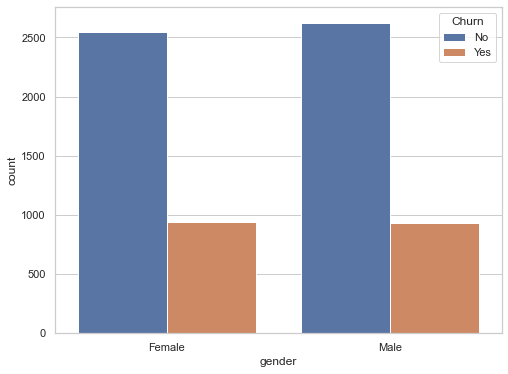

In [65]:
#Graficamente

plt.figure(figsize = (8, 6))
sns.set(style = 'whitegrid')
sns.countplot(df.gender, hue = df.Churn)

In [66]:
receita_gender = df.groupby(by = 'gender')['TotalCharges', 'MonthlyCharges', 'tenure'].mean().round()
receita_gender

<ipython-input-66-35489a780471>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  receita_gender = df.groupby(by = 'gender')['TotalCharges', 'MonthlyCharges', 'tenure'].mean().round()


,TotalCharges,MonthlyCharges,tenure
gender,,,
Female,2280.0,65.0,32.0
Male,2280.0,64.0,32.0


### Conclusão:
   * A variavel 'gender' não incluencia no Churn da empresa, nem nas receitas obtidas


Variável <strong>'SeniorCitizen'</strong>

In [80]:
tabela_churn_idade = pd.crosstab(df.SeniorCitizen, df.Churn, margins = True)
tabela_churn_idade

Churn,No,Yes,All
SeniorCitizen,,,
0,4508,1393,5901
1,666,476,1142
All,5174,1869,7043


In [96]:
print('A porcentagem de pessoas idosas que deixaram a empresa é de {:.2f}%'.format(476/1142*100))
print('A porcentagem de pessoas não idosas que deixaram a empresa é de {:.2f}%'.format(1393/5901*100))

print('='*80)

print('Os idosos correspondem a {:.2f}% do total de clientes da empresa'.format(1142/7043*100))

A porcentagem de pessoas idosas que deixaram a empresa é de 41.68%
A porcentagem de pessoas não idosas que deixaram a empresa é de 23.61%
Os idosos correspondem a 16.21% do total de clientes da empresa


C:\Users\lucas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

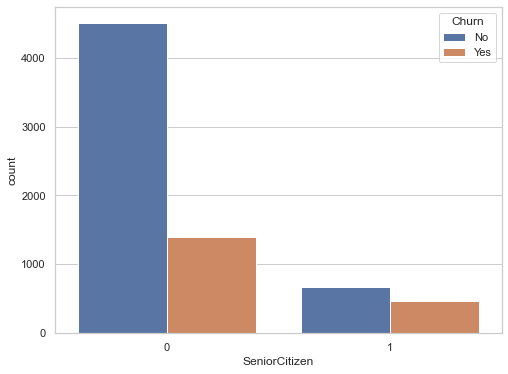

In [81]:
plt.figure(figsize = (8,6))
sns.set(style = 'whitegrid')

sns.countplot(df.SeniorCitizen, hue = df.Churn )

In [83]:
receita_idade = df.groupby(by = 'SeniorCitizen')['TotalCharges', 'MonthlyCharges', 'tenure'].mean().round()
receita_idade

<ipython-input-83-8a23269d2dd7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  receita_idade = df.groupby(by = 'SeniorCitizen')['TotalCharges', 'MonthlyCharges', 'tenure'].mean().round()


,TotalCharges,MonthlyCharges,tenure
SeniorCitizen,,,
0,2177.0,62.0,32.0
1,2810.0,80.0,33.0


### Conclusão:

 * Apesar de representar apenas 16% do total de clientes, os idosos passam em média mais tempo na empresa, tem um gasto mensal maior, o que indica a preferencia deles por pacotes mais completos, além de na média, trazerem uma receita total maior para empresa.
 
      Entendo que os numeros fazem sentido, visto que pessoas mais velhas tendem a passar mais tempo em casa, entao consomem mais televisão que as pessoas mais jovens, e preferem optar por pacotes mais completos, pois preferem concentrar os gastos num lugar só, facilitando o controle.
 
     Por outro lado podemos observar uma taxa de evasao maior para essa faixa de idade, o que indica a necessidade da empresa, em realizar uma análise mais aprofundada nesses clientes e verificar ações que possam aumentar a taxa de retencao desse publico.

Variáveis <strong>'Partner'</strong> e<strong> 'Dependents'</strong>

In [100]:
tabela_churn_parceiro = pd.crosstab(df.Partner, df.Churn, margins = True)
tabela_churn_parceiro


Churn,No,Yes,All
Partner,,,
No,2441,1200,3641
Yes,2733,669,3402
All,5174,1869,7043


In [101]:
tabela_churn_dependentes = pd.crosstab(df.Dependents, df.Churn, margins = True)
tabela_churn_dependentes

Churn,No,Yes,All
Dependents,,,
No,3390,1543,4933
Yes,1784,326,2110
All,5174,1869,7043


C:\Users\lucas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Partner', ylabel='count'>

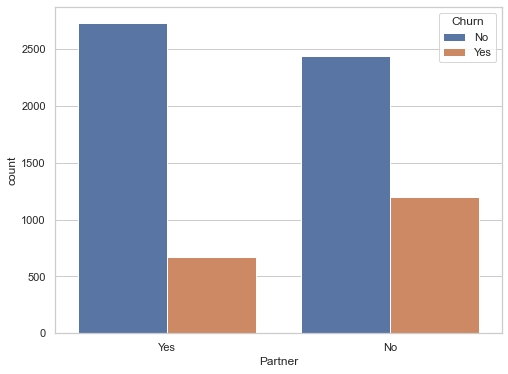

In [154]:
plt.figure(figsize = (8, 6))
sns.set(style = 'whitegrid')
sns.countplot(df.Partner, hue = df.Churn)


C:\Users\lucas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

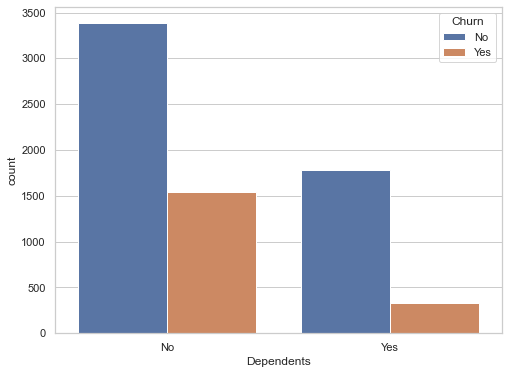

In [155]:
plt.figure(figsize = (8, 6))
sns.set(style = 'whitegrid')
sns.countplot(df.Dependents, hue = df.Churn)

In [157]:
receita_parceiro = df.groupby(by = 'Partner')['TotalCharges', 'MonthlyCharges', 'tenure'].mean().round()
receita_parceiro

<ipython-input-157-7b954576c73b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  receita_parceiro = df.groupby(by = 'Partner')['TotalCharges', 'MonthlyCharges', 'tenure'].mean().round()


,TotalCharges,MonthlyCharges,tenure
Partner,,,
No,1584.0,62.0,23.0
Yes,3024.0,68.0,42.0


In [158]:
receita_dependente = df.groupby(by = 'Dependents')['TotalCharges', 'MonthlyCharges', 'tenure'].mean().round()
receita_dependente

<ipython-input-158-b8e498fbee76>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  receita_dependente = df.groupby(by = 'Dependents')['TotalCharges', 'MonthlyCharges', 'tenure'].mean().round()


,TotalCharges,MonthlyCharges,tenure
Dependents,,,
No,2188.0,67.0,30.0
Yes,2495.0,60.0,38.0


### Conclusão:

* A análise dessas as variáveis mostra que os clientes que possuem parceiros e/ou dependentes gastam mais com a empresa e tem umindice de churn menor. Entende-se que pessoas que solteiras ou que moram sozinhas, não são menos adeptas aos produtos da empresa, pois preferem utilizar o dinheiro com outras coisas e passam menos tempo em casa.

Vamos dar uma olhada agora nos produtos oferecidos, pela empresa

* Tem algum que é mais lucrativo?
* E quanto ao graudo de fidelidade?

In [159]:
df.InternetService.value_counts(normalize = True)

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

21% dos clientes não utilizam serviços de internet. Seria interessante explorar algumas formas para atrair esses clientes.

In [160]:
pd.crosstab(df.InternetService, df.PhoneService, margins = True)

PhoneService,No,Yes,All
InternetService,,,
DSL,682,1739,2421
Fiber optic,0,3096,3096
No,0,1526,1526
All,682,6361,7043


Veja que clientes que não utilizam serviço de telefone, usam servico DSL. Isso significa que o produto de Fibra Ótica só esta disponpivek para aqueles que possue serviços de telefone

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InternetService', ylabel='count'>

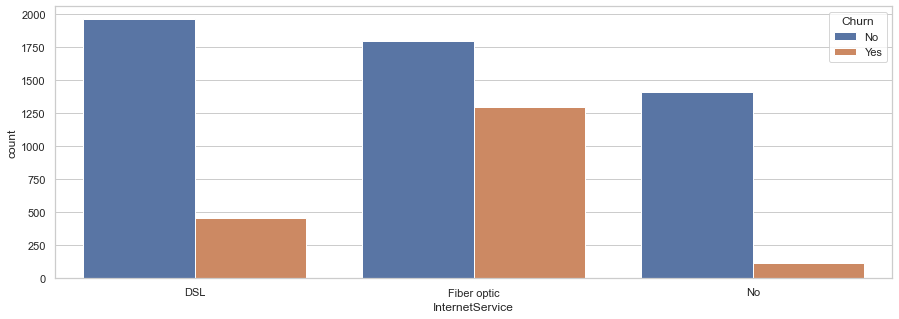

In [161]:
plt.figure(figsize = (15,5))
sns.countplot(df.InternetService, hue = df.Churn)

Com esse gráfico é possível verificar uma alta dendencia de churn por parte dos usuários de Fibra Otica, isso mostra uma certa insatisfaçao dos clientes com esse servico